In [28]:
# Loading all the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [29]:
# Storing the IPL Matches and Deliveries dataset into variables

matches = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\matches.csv')
deliveries = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\deliveries.csv')
most_runs_average_strikerate = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\most_runs_average_strikerate.csv')
teamwise_home_and_away = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\teamwise_home_and_away.csv')
players = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\players.csv')

Text(0, 0.5, 'Matches Played')

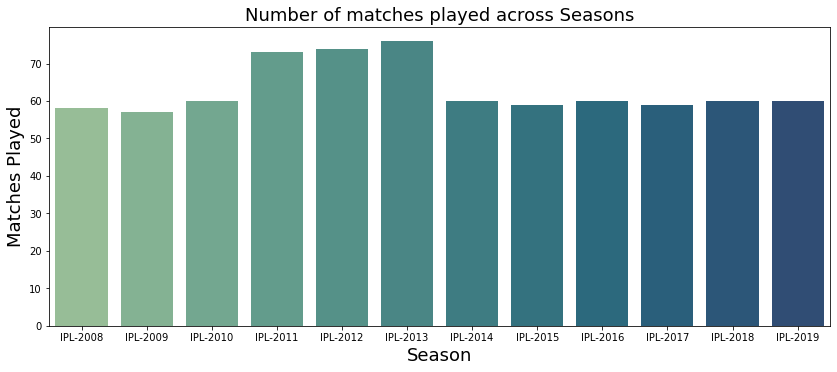

In [30]:
#Plotting the number of matches played in each season of IPL chronologically

plt.subplots(figsize=(14,5.5))
sns.countplot(x = matches['Season'], palette = sns.color_palette('crest',13))  
plt.title('Number of matches played across Seasons', fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Matches Played', fontsize = 18)

Text(0, 0.5, 'Total Runs Scored')

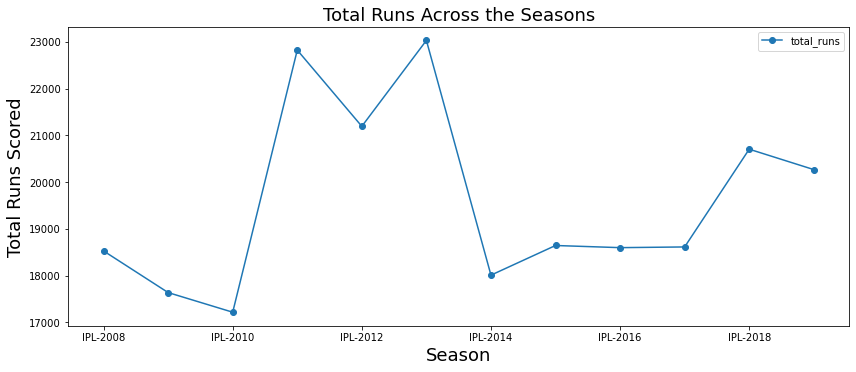

In [31]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='o')
plt.gcf().set_size_inches(14,5.5)
plt.title('Total Runs Across the Seasons', fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Total Runs Scored', fontsize = 18)

Total count for toss carried out :  756
Total times batting was selected :  293
Total times fielding was selected:  463
Percentage of selecting batting  :  38.75661375661375
Percentage of selecting bowling  :  61.24338624338625


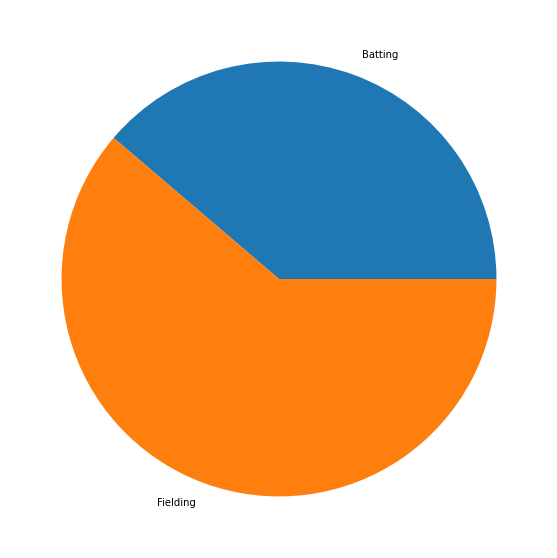

In [32]:
# Information related to the decision that toss winning team made

plt.subplots(figsize = (10,10))

bat_num = matches.loc[matches['toss_decision'] == 'bat', 'toss_decision'].count()
fie_num = matches.loc[matches['toss_decision'] == 'field', 'toss_decision'].count()
total_num = bat_num + fie_num
bat_per = (bat_num / total_num) * 100
fie_per = (fie_num / total_num) * 100
choice = ['Batting', 'Fielding']
data_choice =[bat_num, fie_num] 
plt.pie(data_choice, labels = choice)

print('Total count for toss carried out : ', total_num)
print('Total times batting was selected : ', bat_num)
print('Total times fielding was selected: ', fie_num)
print('Percentage of selecting batting  : ', bat_per)
print('Percentage of selecting bowling  : ', fie_per)

Text(0, 0.5, 'Count')

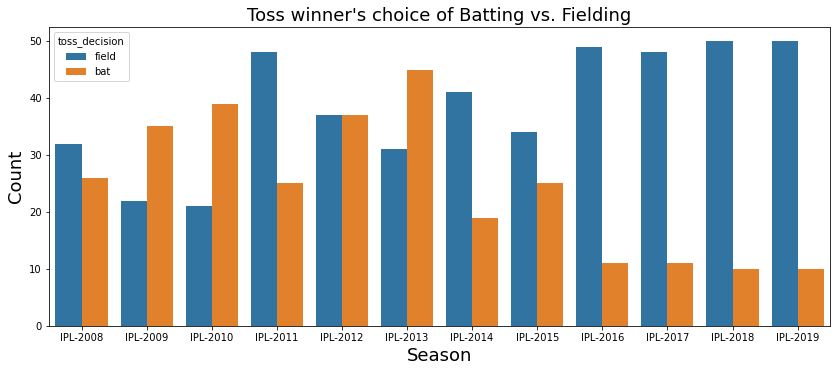

In [33]:
# Information related to the decision that toss winning team made, year wise

plt.subplots(figsize=(14,5.5))
sns.countplot(x='Season',hue='toss_decision',data=matches)
plt.title("Toss winner's choice of Batting vs. Fielding", fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

Text(0, 0.5, 'Team Name')

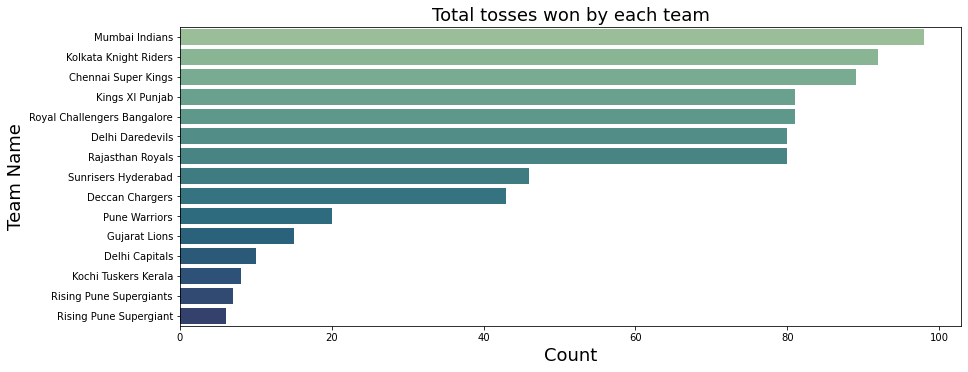

In [34]:
#Plot to show which team won the toss how many times

plt.subplots(figsize=(14,5.5))
sns.countplot(y = matches['toss_winner'], order=matches['toss_winner'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',15))

plt.title('Total tosses won by each team', fontsize = 18)
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Team Name', fontsize = 18)

Text(0, 0.5, 'Name of Country')

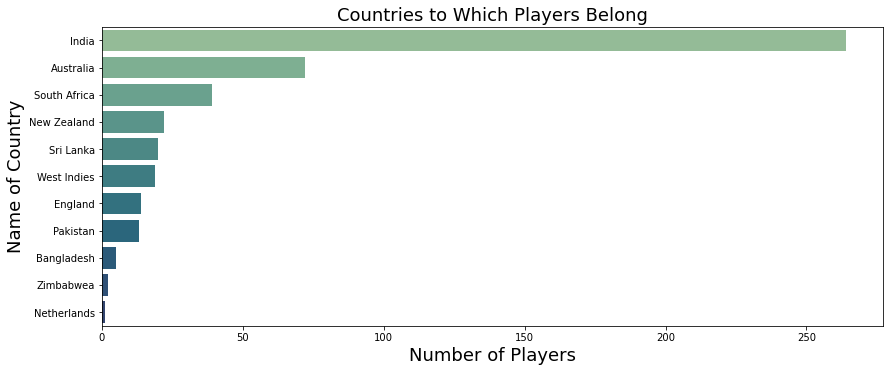

In [35]:
# Information about the countries to which the players belong

plt.subplots(figsize=(14,5.5))
sns.countplot(y = players['Country'], order=players['Country'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',11))
plt.title('Countries to Which Players Belong', fontsize = 18)
plt.xlabel('Number of Players', fontsize = 18)
plt.ylabel('Name of Country', fontsize = 18)

Text(0, 0.5, 'Name of Stadium')

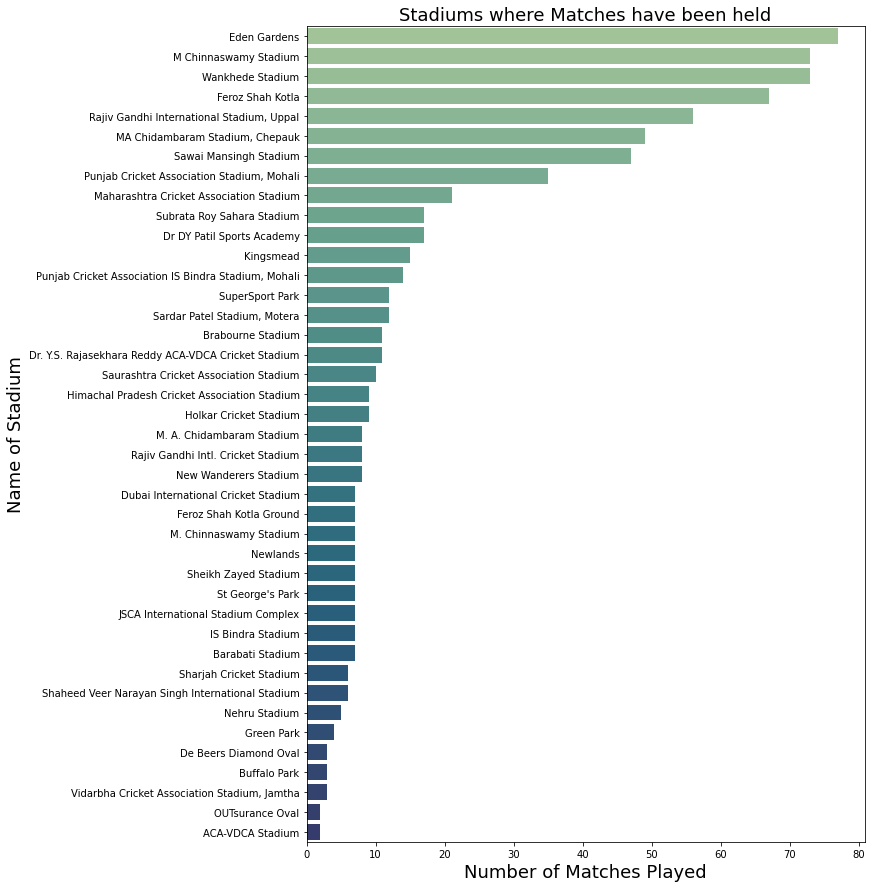

In [36]:
# Information about Stadiums at which matches were played

plt.subplots(figsize=(10,15))
sns.countplot(y = matches['venue'], order = matches['venue'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest', 41))

plt.title('Stadiums where Matches have been held', fontsize = 18)
plt.xlabel('Number of Matches Played', fontsize = 18)
plt.ylabel('Name of Stadium', fontsize = 18)

In [37]:
# Information about Umpires

print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

u_set1 = set(matches['umpire1'].unique())               
u_set2 = set(matches['umpire2'].unique())
u_set3 = set(matches['umpire3'].unique())
all_ump = u_set1.intersection(u_set2)
all_ump = all_ump.intersection(u_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_ump, len(all_ump))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'Ian Gould', 'Nanda Kishore', 'C Shamshuddin', 'A Nanda Kishore', 'Vineet Kulkarni', 'Rod Tucker', 'Chris Gaffaney', 'Bruce Oxenford', 'Yeshwant Barde', 'Anil Dandekar', 'Nigel Llong', 'K Ananthapadmanabhan', 'Ulhas Gandhe', 'Anil Chaudhary', 'Nitin Menon', 'KN Ananthapadmanabhan', 'Kumar Dharmasena', 'O Nandan', 'S Ravi'} 20


Text(0.5, 1.0, 'Umpires-1 who have umpired most (from highest to lowest)')

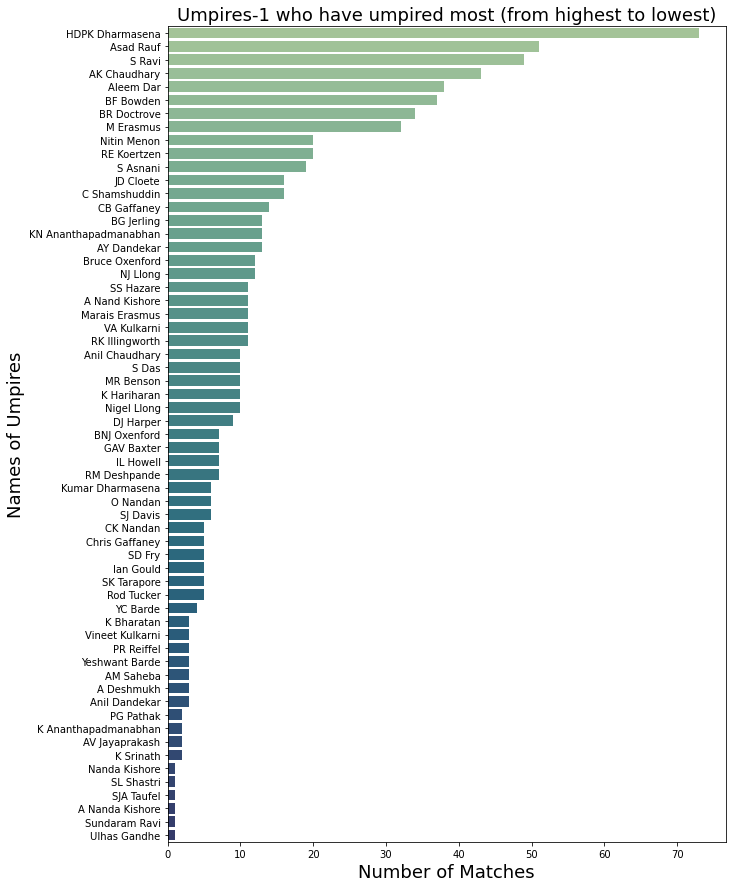

In [38]:
# Information about 1st Umpires

plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire1'], order=matches['umpire1'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',61))

plt.xlabel("Number of Matches", fontsize=18)
plt.ylabel("Names of Umpires", fontsize=18)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=18)

Text(0.5, 1.0, 'Umpires-2 who have umpired most (from highest to lowest)')

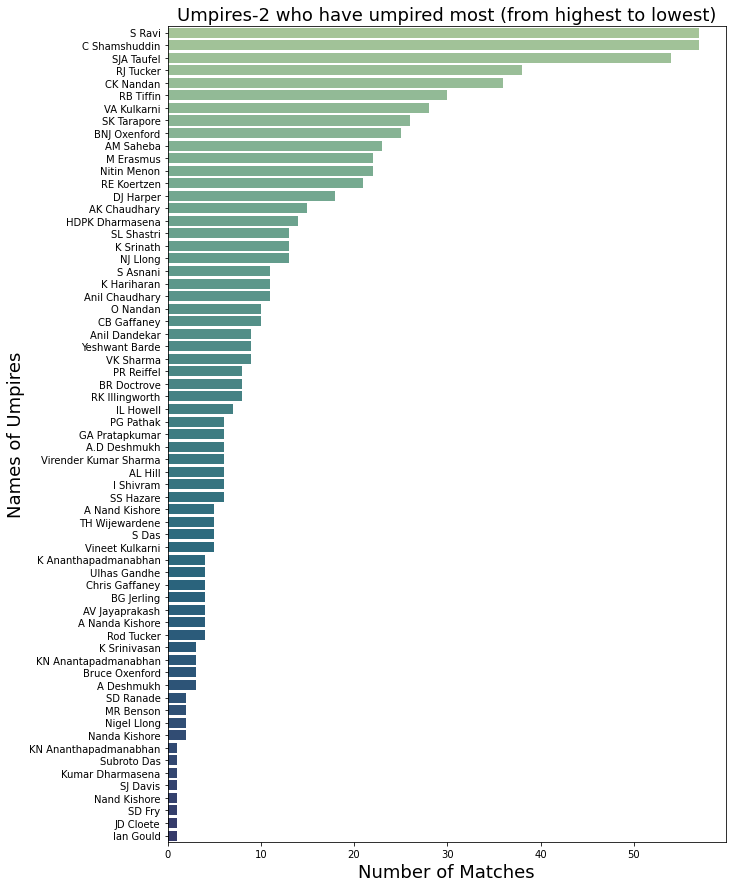

In [39]:
# Information about 2nd Umpires

plt.subplots(figsize = (10, 15))

sns.countplot(y = matches['umpire2'], order=matches['umpire2'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest', 65))

plt.xlabel("Number of Matches", fontsize = 18)
plt.ylabel("Names of Umpires", fontsize = 18)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize = 18)

Text(0.5, 1.0, 'Umpires-3 who have umpired most (from highest to lowest)')

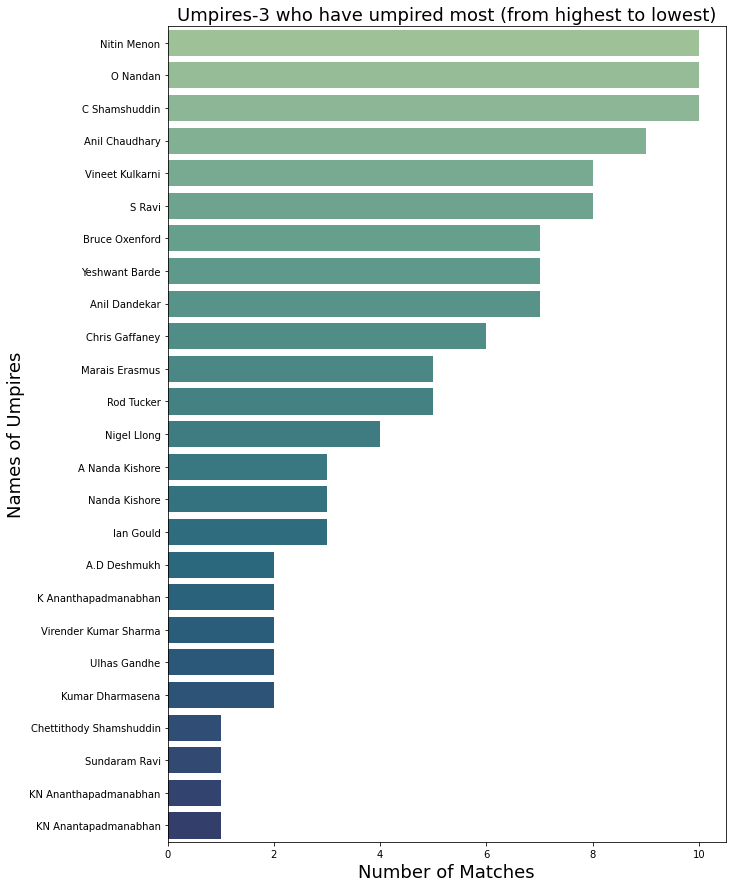

In [40]:
# Information about 3rd Umpires

plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire3'], order=matches['umpire3'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',25))

plt.xlabel("Number of Matches", fontsize = 18)
plt.ylabel("Names of Umpires", fontsize = 18)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=18)

Text(0.5, 1.0, 'Wins on Home Ground')

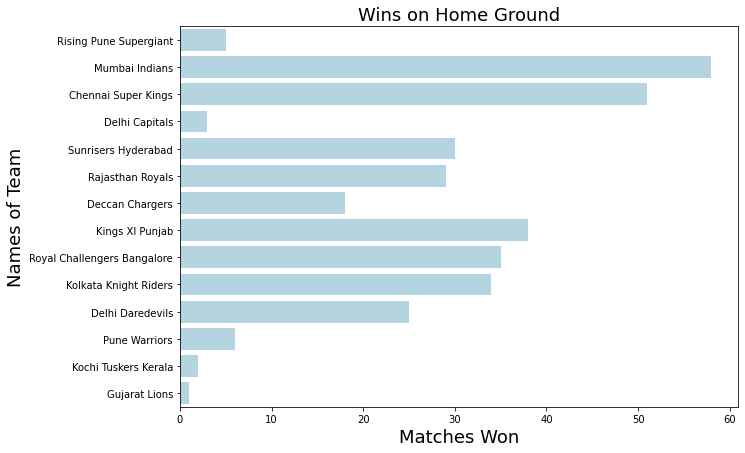

In [41]:
# Plotting Number of times a team has won at home ground

plt.subplots(figsize = (10,7))
sns.barplot(y = teamwise_home_and_away['team'], x = teamwise_home_and_away['home_wins'], color = 'lightblue')

plt.xlabel("Matches Won", fontsize = 18)
plt.ylabel("Names of Team", fontsize = 18)
plt.title("Wins on Home Ground", fontsize=18)

Text(0.5, 1.0, 'Wins on Away Ground')

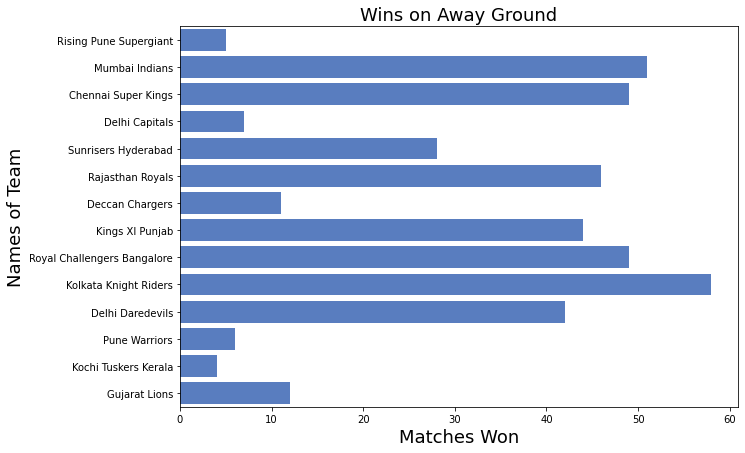

In [42]:
# Plotting Number of times a team has won at away ground

plt.subplots(figsize = (10,7))
sns.set_color_codes("muted")
sns.barplot(y = teamwise_home_and_away['team'], x = teamwise_home_and_away['away_wins'], color = 'b')

plt.xlabel("Matches Won", fontsize = 18)
plt.ylabel("Names of Team", fontsize = 18)
plt.title("Wins on Away Ground", fontsize=18)

Text(0.5, 1.0, 'Total count of Boundaries')

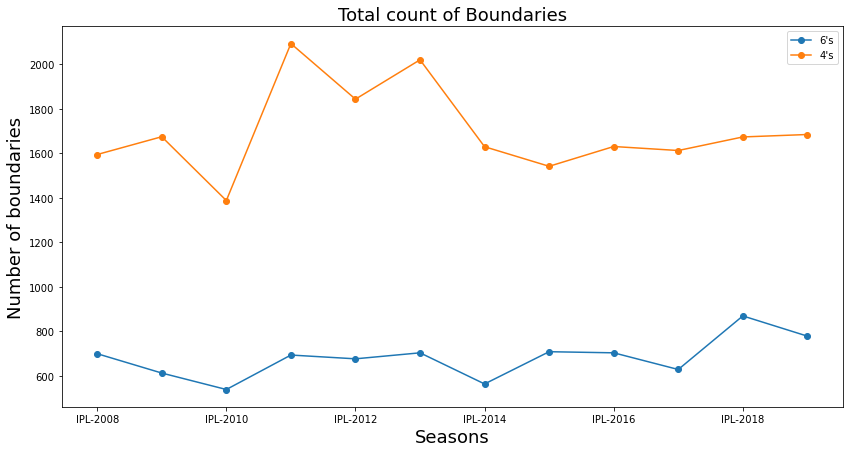

In [43]:
# Plotting number of boundaries scored in each season

Season_boundaries = batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a = batsmen.groupby("Season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries = Season_boundaries.merge(a,left_on = 'Season', right_on = 'Season', how = 'left')
Season_boundaries = Season_boundaries.rename(columns = {'batsman_runs_x':"6's", 'batsman_runs_y':"4's"})
Season_boundaries.set_index('Season')[["6's", "4's"]].plot(marker = 'o')
fig=plt.gcf()
fig.set_size_inches(14, 7)

plt.xlabel("Seasons", fontsize = 18)
plt.ylabel("Number of boundaries", fontsize = 18)
plt.title("Total count of Boundaries", fontsize=18)

Text(0.5, 1.0, "Team's Performance in a match")

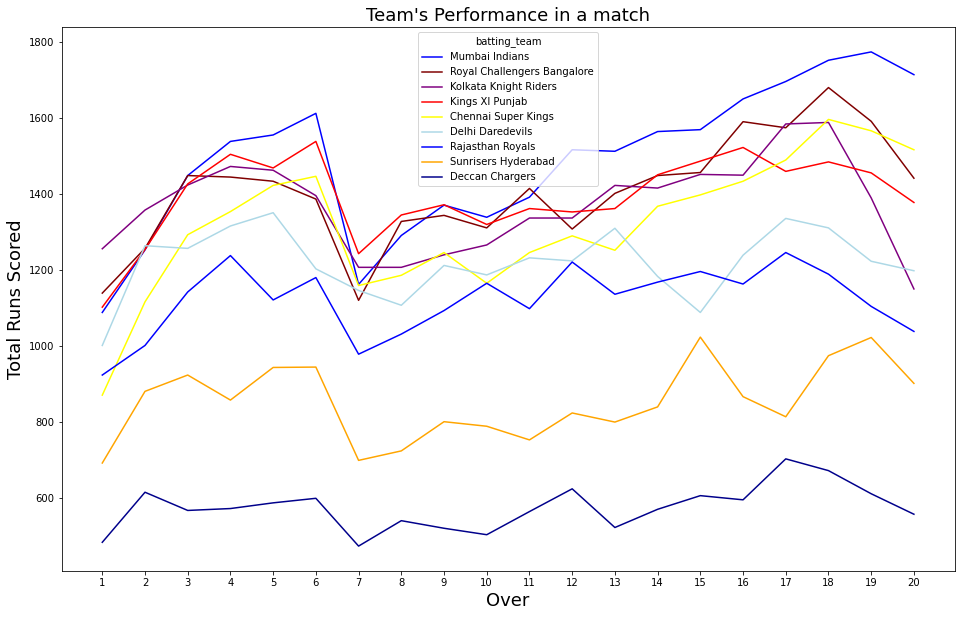

In [44]:
# Plotting team-wise, over-wise total runs for all seasons
# P.S - Only for teams that have played more than 50 matches

matches_played_byteams = pd.concat([matches['team1'],matches['team2']])
matches_played_byteams = matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns = ['Team', 'Total Matches']

matches_played_byteams['wins'] = matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index('Team', inplace = True)

runs_per_over = deliveries.pivot_table(index = ['over'], columns = 'batting_team', values = 'total_runs', aggfunc = sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches'] > 50].index)].plot(color = ['blue', 'maroon', 'purple', 'red','yellow','lightblue','blue','orange','darkblue']) 

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig = plt.gcf()
fig.set_size_inches(16,10)

plt.xlabel("Over", fontsize = 18)
plt.ylabel("Total Runs Scored", fontsize = 18)
plt.title("Team's Performance in a match", fontsize=18)

Text(0.5, 1.0, 'Top 5 match winning teams')

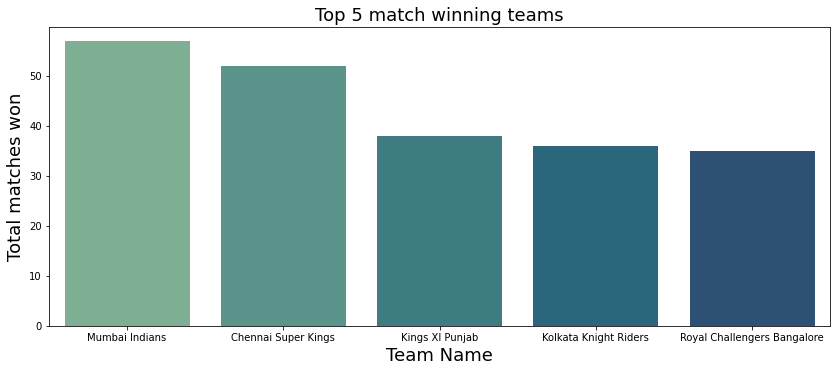

In [45]:
# Extracting record of instances where a team has won when choosing to bat first and viewing the first few elements of the table

batting_first = matches[matches['win_by_runs'] != 0]
batting_first.head()

# Teams that have won maximum matches

plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(batting_first['winner'].value_counts()[0:5].keys()), y = batting_first['winner'].value_counts()[0:5], palette = sns.color_palette('crest',5))

plt.xlabel("Team Name", fontsize = 18)
plt.ylabel("Total matches won", fontsize = 18)
plt.title("Top 5 match winning teams", fontsize=18)

Number of times a Team has won the toss and the match     :  393
Number of times a Team has won the toss and lost the match:  363
Percentage of Wins:  51.98412698412699
Percentage of Loss:  48.01587301587302


Text(0.5, 1.0, 'Pie-Chart')

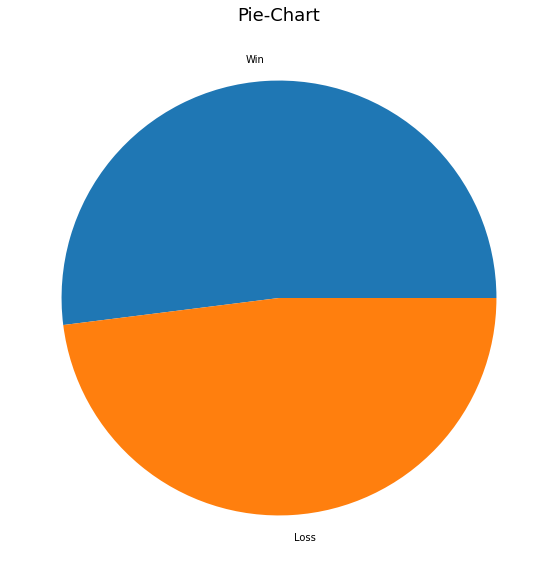

In [46]:
# Pie chart to see how many teams that won the toss, also won the match,
# Hence trying to see if there is a correlation between winning the toss and winning the match

plt.subplots(figsize = (10,10))

tm_win = matches.loc[matches['toss_winner'] == matches['winner'], 'toss_winner'].count()
tm_lose = matches.loc[matches['toss_winner'] != matches['winner'], 'toss_winner'].count()
tm_total = tm_win + tm_lose
res = ['Win', 'Loss']
data_res = [matches.loc[matches['toss_winner'] == matches['winner'], 'toss_winner'].count(),
            matches.loc[matches['toss_winner'] != matches['winner'], 'toss_winner'].count()]
plt.pie(data_res, labels = res)

print("Number of times a Team has won the toss and the match     : ", tm_win)
print("Number of times a Team has won the toss and lost the match: ", tm_lose)
print("Percentage of Wins: ", (tm_win / tm_total) * 100)
print("Percentage of Loss: ", (tm_lose / tm_total) * 100)

plt.title("Pie-Chart", fontsize=18)

Text(0.5, 1.0, 'Distribution of Runs')

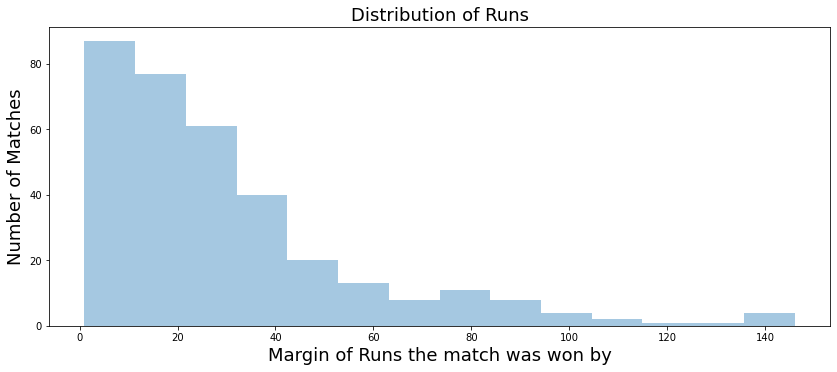

In [47]:
# Histogram to display the margin of runs a match has been won by

plt.subplots(figsize = (14,5.5))
sns.distplot(a = batting_first['win_by_runs'], kde = False, hist = True, bins = 14)

plt.xlabel('Margin of Runs the match was won by', fontsize = 18)
plt.ylabel('Number of Matches', fontsize = 18)
plt.title('Distribution of Runs', fontsize = 18)

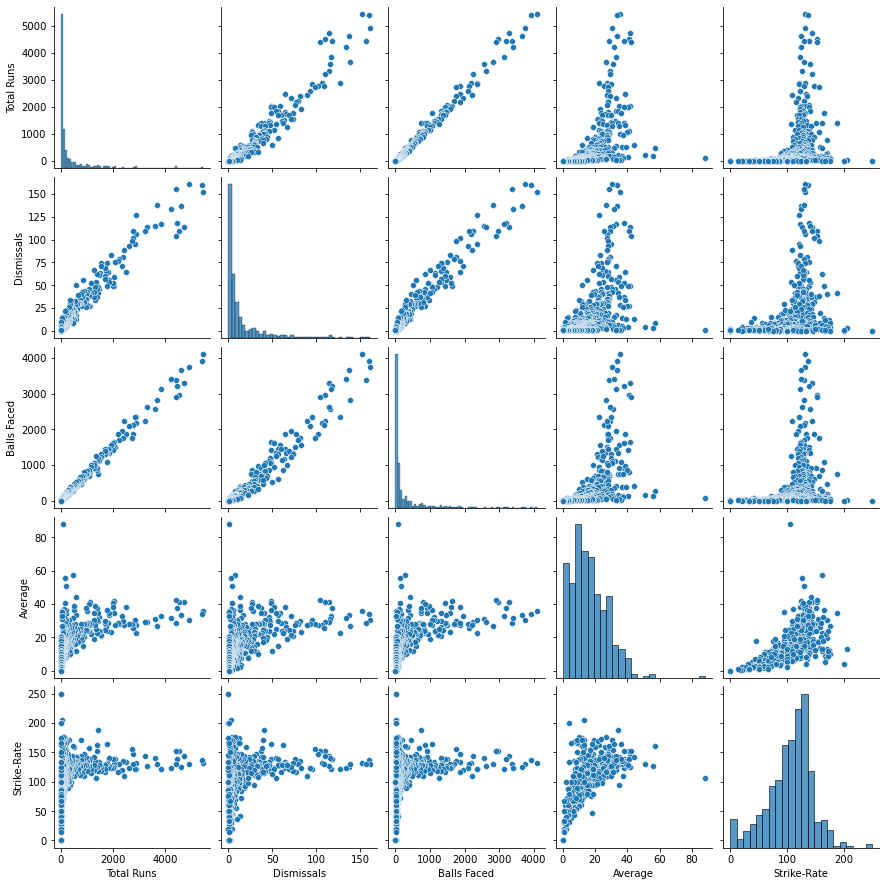

In [48]:
# Plotting a Pair-plot for various batting-related statistics such as:
# Total Runs, Dismissals, Balls Faced, Average, Strike-Rate

sns.pairplot(most_runs_average_strikerate)

Number of Right-Handed Batsmen:  373
Number of Left-Handed Batsmen :  142


Text(0.5, 1.0, 'Pie Chart')

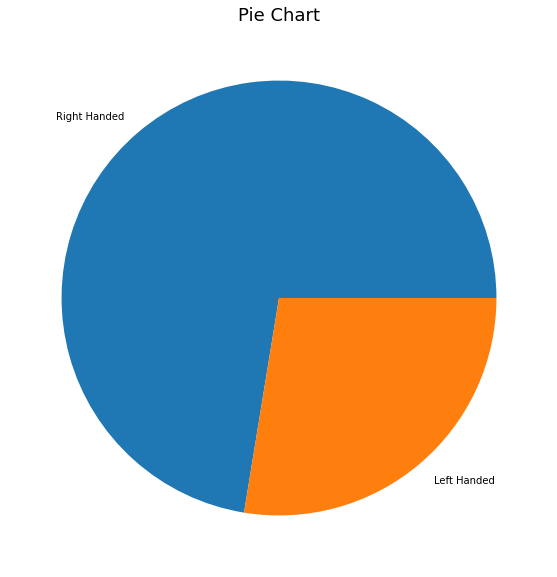

In [49]:
# Pie chart to see how many Left and Right handed batsmen are there

plt.subplots(figsize = (10,10))

r_handed = players.loc[players['Batting_Hand'] == 'Right_Hand', 'Batting_Hand'].count()
l_handed = players.loc[players['Batting_Hand'] == 'Left_Hand', 'Batting_Hand'].count()
handed = ['Right Handed', 'Left Handed']
data_handed = [r_handed, l_handed]
plt.pie(data_handed, labels = handed)

print("Number of Right-Handed Batsmen: ", r_handed)
print("Number of Left-Handed Batsmen : ", l_handed)

plt.title("Pie Chart", fontsize = 18)

Text(0.5, 1.0, 'Performance of top 5 batsmen')

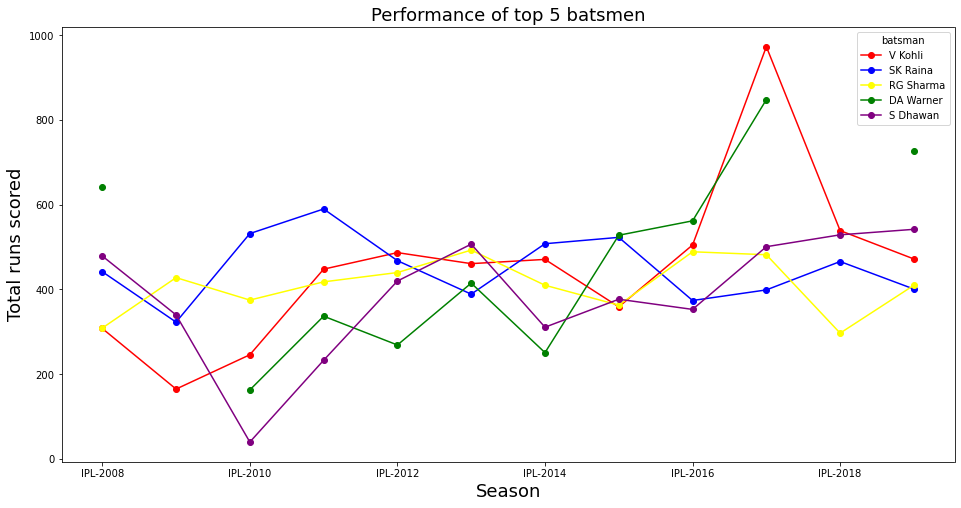

In [50]:
# Graph to see Season-wise performance of top 5 overall run-scoring batsmen

men = batsmen.groupby(['Season', 'batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['Season', 'batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis = 1)
men = men.sort_values(by = 'Total', ascending = False)[:5]
men.drop('Total', axis = 1, inplace = True)
men.T.plot(color=['red', 'blue', 'yellow', 'green', 'purple'], marker = 'o')
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.xlabel('Season', fontsize = 18)
plt.ylabel('Total runs scored', fontsize = 18)
plt.title('Performance of top 5 batsmen', fontsize = 18)

Text(0.5, 1.0, 'Performance of top 20 bowlers')

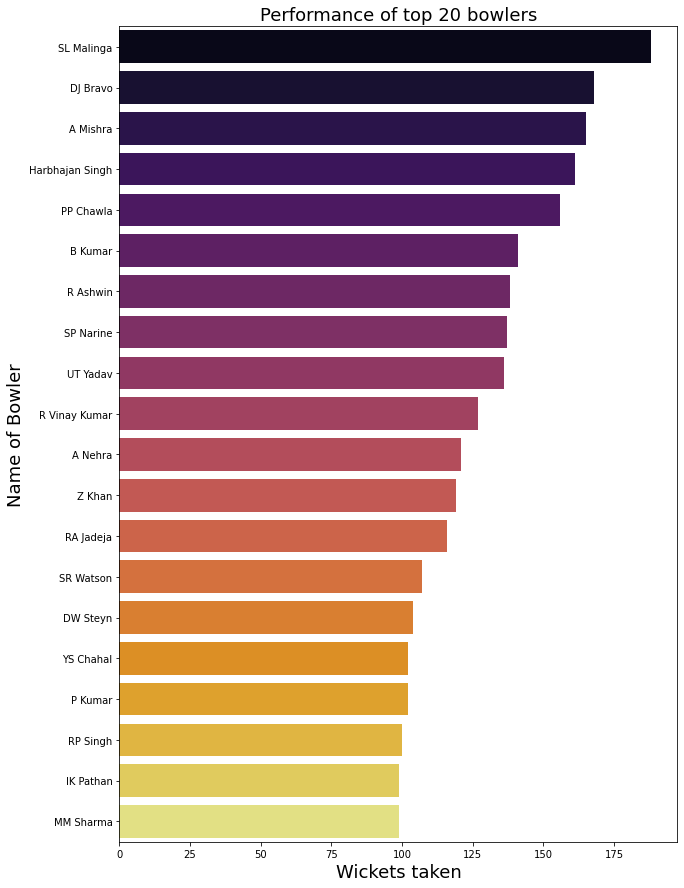

In [51]:
# Extracting record of instances where a wicket was taken on a delivery

delivery_with_wicket = deliveries.loc[deliveries['dismissal_kind'].notnull()]

# Plotting information about top 20 overall bowlers based on how many wickets they took

plt.subplots(figsize=(10,15))
sns.barplot(x = delivery_with_wicket['bowler'].value_counts()[0:20], y = list(delivery_with_wicket['bowler'].value_counts()[0:20].keys()), palette = sns.color_palette('inferno',20))

plt.xlabel('Wickets taken', fontsize = 18)
plt.ylabel('Name of Bowler', fontsize = 18)
plt.title('Performance of top 20 bowlers', fontsize = 18)

Percentage of "Bowled" dismissals           :  18.53023909985935
Percentage of "Caught" dismissals           :  62.68166901078294
Percentage of "LBW" dismissals              :  6.329113924050633
Percentage of "Caught and Bowled" dismissals:  2.4730426629160807
Percentage of "Run Out" dismissals          :  9.985935302390999


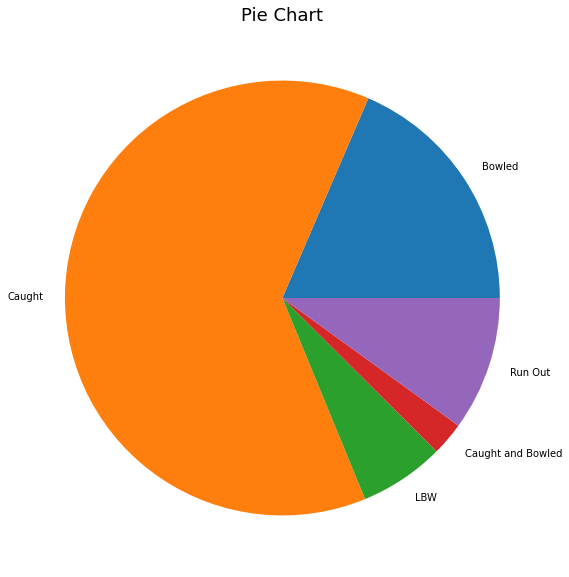

In [64]:
# Pie Chart to show the category of dismissal such as caught, bowled, run out, LBW

plt.subplots(figsize = (10,10))

dismiss_bowled = delivery_with_wicket.loc[delivery_with_wicket['dismissal_kind'] == 'bowled', 'dismissal_kind'].count()
dismiss_caught = delivery_with_wicket.loc[delivery_with_wicket['dismissal_kind'] == 'caught', 'dismissal_kind'].count()
dismiss_lbw = delivery_with_wicket.loc[delivery_with_wicket['dismissal_kind'] == 'lbw', 'dismissal_kind'].count()
dismiss_cab = delivery_with_wicket.loc[delivery_with_wicket['dismissal_kind'] == 'caught and bowled', 'dismissal_kind'].count()
dismiss_rout = delivery_with_wicket.loc[delivery_with_wicket['dismissal_kind'] == 'run out', 'dismissal_kind'].count()
dismiss_total = dismiss_bowled + dismiss_caught + dismiss_lbw + dismiss_cab + dismiss_rout

dismissed = ['Bowled', 'Caught', 'LBW', 'Caught and Bowled', 'Run Out']
data_dismissed = [dismiss_bowled, dismiss_caught, dismiss_lbw, dismiss_cab, dismiss_rout]

plt.pie(data_dismissed, labels = dismissed)
plt.title("Pie Chart", fontsize = 18)

print('Percentage of "Bowled" dismissals           : ', (dismiss_bowled / dismiss_total) * 100)
print('Percentage of "Caught" dismissals           : ', (dismiss_caught / dismiss_total) * 100)
print('Percentage of "LBW" dismissals              : ', (dismiss_lbw / dismiss_total) * 100)
print('Percentage of "Caught and Bowled" dismissals: ', (dismiss_cab / dismiss_total) * 100)
print('Percentage of "Run Out" dismissals          : ', (dismiss_rout / dismiss_total) * 100)

Text(0.5, 1.0, 'Top 10 Man of The Match Award Winners')

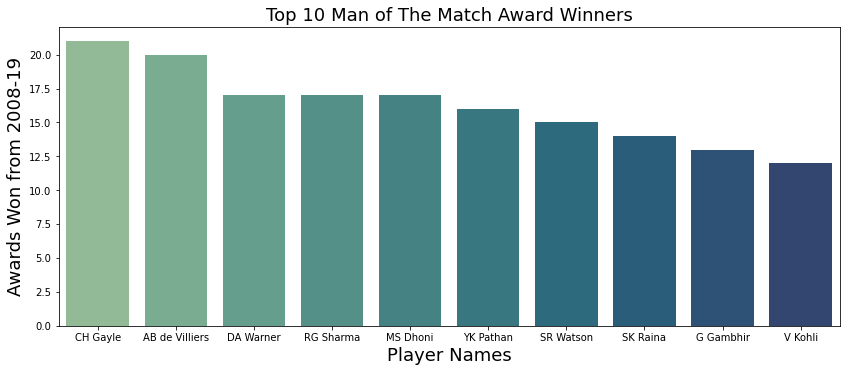

In [53]:
# Barplot to display the names of the players who have won maximum 'Man of The Match' Award

plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(matches['player_of_match'].value_counts()[0:10].keys()), y = list(matches['player_of_match'].value_counts()[0:10]),palette = sns.color_palette('crest', 10))

plt.xlabel('Player Names', fontsize = 18)
plt.ylabel('Awards Won from 2008-19', fontsize = 18)
plt.title('Top 10 Man of The Match Award Winners', fontsize = 18)

In [54]:
# List of 10 matches with maximum runs scored

high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232
